In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from sklearn import svm
from sklearn.metrics import classification_report
# from IPython.display import display


In [116]:
#Images
def whitePixelCount(img):
    pixels = np.zeros(image.shape, image.dtype)
    countPixels = 0
    for row in range(pixels.shape[0]):
        for col in range(pixels.shape[1]):
            px = pixels[row,col]
            b,g,r = px
            if b == 255 and g == 255 and r == 255:
                countPixels+=1
    return countPixels


img_train = []
img_test = []
data_test = []
data_train = []
kp_train = []
kp_test = []
label_train = []
label_test = []
segmentor = SelfiSegmentation()
sift = cv.SIFT_create()
for i in range(3):
    for j in range(20):
        trainString = f"Train/{i}/{j}.jpg"
        train = cv.imread(trainString)
        # grayTrain = cv.cvtColor(train,cv.COLOR_BGR2GRAY)
        # cannyTrain = cv.Canny(grayTrain,245,255)
        img_Out = segmentor.removeBG(train, (0,0,0), threshold=0.99)
        kp,desc = sift.detectAndCompute(img_Out,None)
        # kp_train.append(whitePixelCount(train))
        trainDesc = []
        f = 0
        for l in range(21):
                for f in range(128):
                    trainDesc.append(desc[l][f])
            
        kp_train.append(trainDesc)
        # print((desc[0]))
        label_train.append(i)
        # label_train.append(i)
        # data_train[trainString] = desc
        data_train.append((trainString,desc))
        if j < 10:
            testString = f"Test/{i}/{j}.jpg"
            test = cv.imread(testString)
            grayTest = cv.cvtColor(test,cv.COLOR_BGR2GRAY)
            cannyTest = cv.Canny(grayTest,245,255)
            img_Out1 = segmentor.removeBG(test, (0,0,0), threshold=0.99)
            kp,desc1 = sift.detectAndCompute(img_Out1,None)
            # kp_test.append(whitePixelCount(test))
            f = 0
            testDesc = []
            for l in range(21):
                for f in range(128):
                    testDesc.append(desc1[l][f])
                # f = f + 1
            kp_test.append(testDesc)
            # print(len(desc1[:2][1]))
            # np.append(kp_test,desc1[0])
            label_test.append(i)
            data_test.append((testString, desc))
# print(len(label_test))
# print(len(kp_test))

In [118]:

# print(len(kp_train[2]))
# from sklearn.neighbors import KNeighborsClassifier
# import sklearn.metrics
# from sklearn.multioutput import MultiOutputClassifier
# descriptorArrayTrain = [[0]*128]*60
# for i in range(60):
#     for j in range(128):
#         # print(kp_train[i*j])
#         descriptorArrayTrain[i][j] = kp_train[i*j]
# descriptorArrayTest = [[0]*128]*30
# # print(len(kp_test[0][1]))
# sum = 0;
# distArray = []
# finalDistance = []
# predictedLabels = []
# for i in range(30):
#     for j in range(60):
#         a = np.array(kp_train[j])
#         b = np.array(kp_test[i])
#         for f in range(5):
#             for k in range(128):
#                 sum = sum + ((a[f][k]-b[f][k])**2)
#         dist = np.sqrt(sum)
#         distArray.append(dist)
#         # print(dist)
#     # print(len(distArray))
#     # print((distArray.index(max(distArray))))
#     finalDistance.append(max(distArray))
#     predictedLabels.append(distArray.index(max(distArray)))

#     # print(label_test[(distArray.index(max(distArray)))])
#     distArray = []
# correct = 0
# all = 0
# for i in range(len(finalDistance)):
#     if(label_train[predictedLabels[i]] == label_test[i]):
#         correct = correct + 1
#     all = all + 1
# print(correct)
# for i in range(30):
#     for j in range(128):
#         print(i,j)
#         # print(j)
#         # print(kp_test[i*j])
#         descriptorArrayTest[i][j] = kp_test[i][j]

model = svm.SVC()
# # for i in range(60):
# #     model.fit(kp_train[[i]], label_train)
# #     y_pred = model.predict(kp_test[[i]])
# #     svm_accuracy = sklearn.metrics.accuracy_score(y_pred, label_test)
# #     print(i,': ',svm_accuracy)
# # knn = KNeighborsClassifier(n_neighbors=1)
# # model = MultiOutputClassifier(knn, n_jobs=-1)
# # kp_train = np.reshape(kp_train, (-1, 1))
# # label_train = np.reshape(label_train, (-1, 2))
# kp_train = kp_train.reshape(60, 128)
# kp_test = kp_test.reshape(30, 128)
model.fit(kp_train, label_train)
# print()
# kp_test = np.reshape(kp_test, (-1, 1))
# # label_test = np.reshape(label_test, (-1, 2))
predictedResult = model.predict(kp_test)
# print("Accuracy: ", model.score(kp_test,label_test))
print(classification_report(label_test, predictedResult))
# predicted = model.predict(label_test,kp_test)
# print(classification_report(label_test,predicted))
# print("F1 score: ", metrics.f1_score(label_test,predictedResult))


Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.88      0.70      0.78        10
           2       0.89      0.80      0.84        10

    accuracy                           0.80        30
   macro avg       0.82      0.80      0.80        30
weighted avg       0.82      0.80      0.80        30



In [145]:
image = cv.imread("s4.jpg")
img_Out1 = segmentor.removeBG(image, (0,0,0), threshold=0.99)
kp,desc = sift.detectAndCompute(img_Out1,None)
testDesc = []
descArr = []
for l in range(21):
    for f in range(128):
        testDesc.append(desc[l][f])
descArr.append(testDesc)
print(model.predict(descArr))

[1]


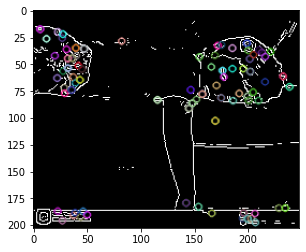

(<matplotlib.image.AxesImage at 0x1d15d77fc10>, None)

In [137]:

image=cv.imread("s1.jpg")
cannyTest = cv.Canny(image,245,255)
kp,desc = sift.detectAndCompute(cannyTest,None)
img=cv.drawKeypoints(cannyTest,kp,image)
plt.imshow(img), plt.show()

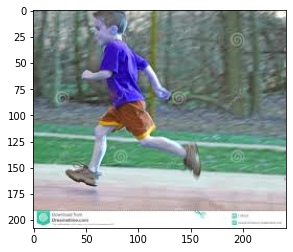

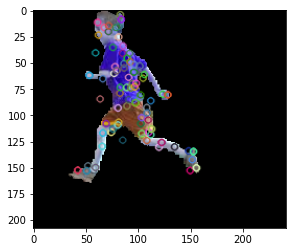

(<matplotlib.image.AxesImage at 0x2b8da12a100>, None)

In [117]:
segmentor = SelfiSegmentation()
sift = cv.SIFT_create()
image=cv.imread("Test/2/7.jpg")
plt.imshow(image), plt.show()
img_Out = segmentor.removeBG(image, (0,0,0), threshold=0.99)
kp,desc = sift.detectAndCompute(img_Out,None)
img=cv.drawKeypoints(img_Out,kp,image)
plt.imshow(img), plt.show()
